In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = data.load_data()
tf.random.set_seed(69)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
# X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))
print(X_train.shape)
print(X_test.shape)
X_train/255.0
X_test/255.0
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    # layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.1)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.8438 - loss: 1.3236 - val_accuracy: 0.9792 - val_loss: 0.0662
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9773 - loss: 0.0729 - val_accuracy: 0.9843 - val_loss: 0.0535
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9836 - loss: 0.0502 - val_accuracy: 0.9867 - val_loss: 0.0522
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9866 - loss: 0.0411 - val_accuracy: 0.9885 - val_loss: 0.0411
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9884 - loss: 0.0363 - val_accuracy: 0.9815 - val_loss: 0.0699
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 62ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.9875 - val_loss: 0.0565
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9925 - loss: 0.0245 - 

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict on test images
# predictions = model.predict(X_test)

# Display a sample prediction
# plt.imshow(X_test[0].reshape(28,28), cmap='gray')
# plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
# plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9834 - loss: 0.0693
Test accuracy: 0.9858


In [ ]:
# predictions[0]

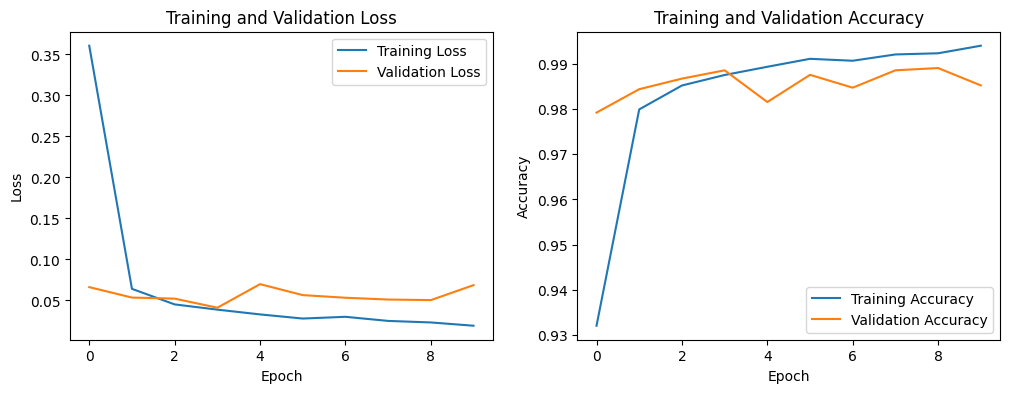

In [ ]:
# plotting the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()